In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [24]:
df=pd.read_csv('C:\\Users\\Gaura\\OneDrive\\Desktop\\dataset\\IMDB Sentimental Dataset.csv')
df.dropna(how="any", inplace=True, axis=1) #here we are dropping the columns which where empty
df.columns = ['label', 'message'] # and here we are giving the name to the columns lables and messgaes
# which where v1 and v2 earlier
df.head()

,label,message
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [25]:
df.rename(columns = {'label':'Movie_reviews'}, inplace = True)
df.rename(columns = {'message':'label'}, inplace = True)

In [26]:
df.head()

,Movie_reviews,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# EDA

In [27]:
df.describe()
# count:- tells us how many rows are present in our dataset
# unique :- tells us that how many unique words are present in our dataset

,Movie_reviews,label
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [28]:
df1 = pd.DataFrame({'categorical': pd.Categorical(['d','e','f','e']),
                   'numeric': [1, 2, 3,4],
                   'object': ['a', 'b', 'c','a']
                  })
df1.describe(include=[object])

,object
count,4
unique,3
top,a
freq,2


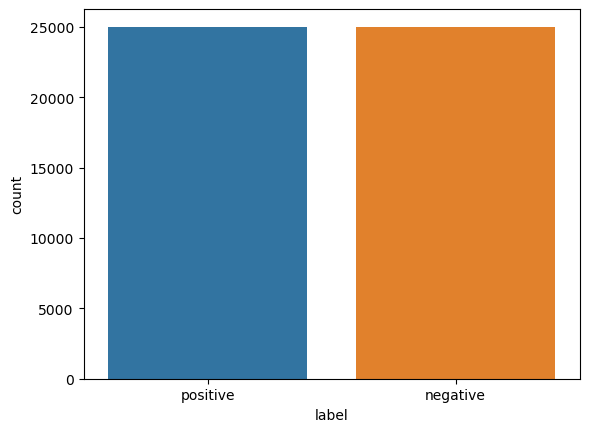

In [29]:
sns.countplot(x='label',data=df)
plt.show()

In [30]:
#converting the spam and ham into the numbers 0=ham and 1=spam messages
df['label_num'] = df.label.map({'positive':1, 'negative':0})
df.head()

,Movie_reviews,label,label_num
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [31]:
# finding the message length and and determining if the -ve reviews have the longest length or the 
# +ve review
df['message_len'] = df.Movie_reviews.apply(len)
df.head()

,Movie_reviews,label,label_num,message_len
0,One of the other reviewers has mentioned that ...,positive,1,1761
1,A wonderful little production. <br /><br />The...,positive,1,998
2,I thought this was a wonderful way to spend ti...,positive,1,926
3,Basically there's a family where a little boy ...,negative,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,1317


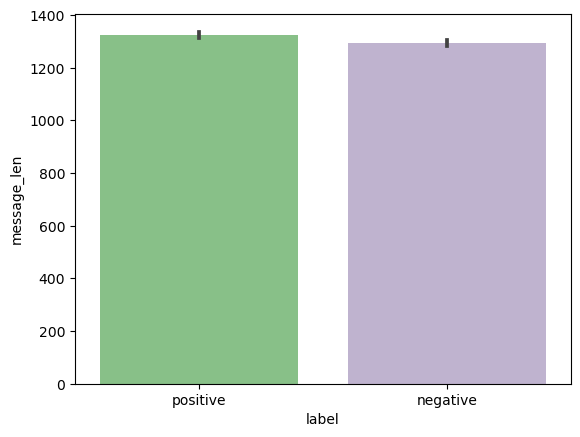

In [32]:
sns.barplot(x='label',y='message_len',data=df,palette = "Accent")
plt.show()
#here both the +ve and the -ve message length are same .there is little difference between the +ve and the 
# -ve message

In [33]:
# forming the WordCloud

In [34]:
import wordcloud
# The copy() method is used to create a new DataFrame object with the same data and column labels
# as the original DataFrame. This is important to ensure that any changes made to data_ham 
# will not affect the original df DataFrame.
data_pos  = df[df['label_num'] == 1].copy()
data_neg = df[df['label_num'] == 0].copy()

In [35]:
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['Movie_reviews'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

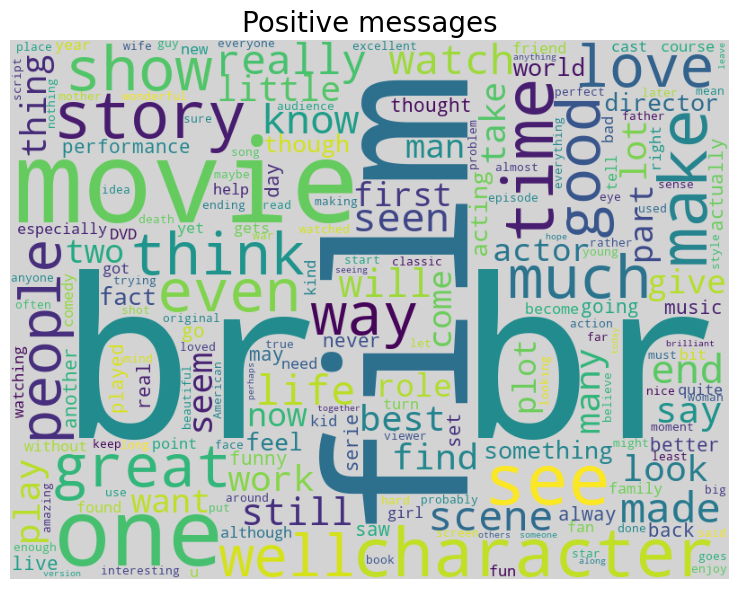

In [36]:
show_wordcloud(data_pos, "Positive messages")

In [37]:
# as we can see from the word cloud that the most commong words that are used while writing the +ve 
# commets on the on the Movies are 
# 1.good,
#2.charavter 
#3.story 
#4.show 
#5.film 
#6.movie 
#7.time
#8.br 
#9.make 
#10.way 
#11.think

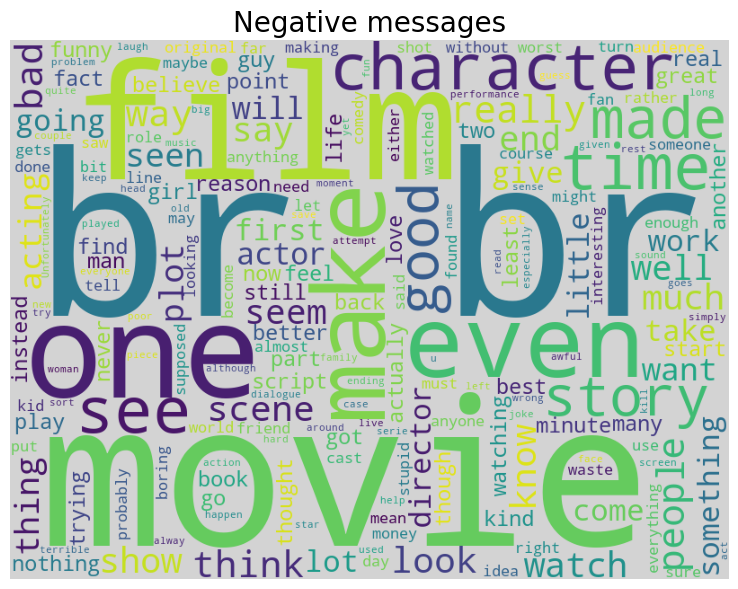

In [38]:
show_wordcloud(data_neg, "Negative messages")

In [39]:
# as we can see from the word cloud that the most commong words that are used while writing the -ve 
# commets on the on the Movies are 
# 1.movie,2.make 3.even 4.character 5.story 6.time 7.br

# text cleanig and pre-processing

In [46]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gaura\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [47]:
# removing the stop words 
# removing the Puntuations
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [48]:
corpus=[]
for i in range(len(df)):
    #sub-->removing the words 
    # and in our case we are removing the everything except the letters a-z and A-Z and if we want to keep the numbers we have
    # write [^a-bA-Z0-9]
    rp=re.sub('[^a-zA-Z]'," ",df['Movie_reviews'][i])
    # we are converting everyting into the lower case bcoz the stop words that we have in our library are small
    rp=rp.lower()
    rp=rp.split()
    #here it is checking if the words that we have in (rp) is in the present in our library of stop words if not then are 
    #gong to store it into the rp again
    rp=[ps.stem(word) for word in rp if not word  in set(stopwords.words('english'))]
    rp=" ".join(rp)
    corpus.append(rp)
corpus

['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch d

In [49]:
df['clean_mess']=corpus
df.head()

,Movie_reviews,label,label_num,message_len,clean_mess
0,One of the other reviewers has mentioned that ...,positive,1,1761,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,1,998,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,positive,1,926,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,0,748,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,1317,petter mattei love time money visual stun film...


# vectorisation

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf=TfidfVectorizer()
x=Tfidf.fit_transform(corpus).toarray()
print(type(x))

<class 'numpy.ndarray'>


In [51]:
y=pd.get_dummies(df['label_num'],drop_first=True)
y

,1
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [52]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split

print('X data before spliting:',x.shape)
print('Y data before spliting: ',y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=1)

X data before spliting: (50000, 68997)
Y data before spliting:  (50000, 1)


MemoryError: Unable to allocate 18.0 GiB for an array with shape (35000, 68997) and data type float64